# Part 1: General Concepts of GNNs

## Resume:

The first part of this course focuses on the foundational concepts of Graph Neural Networks (GNNs). It covers the essential theoretical framework behind GNNs, including the structure of graphs, the process of message passing, and the algorithms used for graph isomorphism. We will learn about the core principles that enable GNNs to operate on graph data, understanding key techniques such as the Weisfeiler-Lehman test and various approaches to addressing the graph isomorphism problem.

## Part 1: General Concepts of GNNs

### 1. Introduction to Graphs
- **Setup and Package Installation**
- **Definition and Components:** Nodes, edges, adjacency matrices.
- **Types of Graphs:** Directed vs. undirected, weighted vs. unweighted, cyclic vs. acyclic.
- **Applications of Graphs:** Social networks, molecular structures, knowledge graphs.

### 2. Message Passing in GNNs
- **Basic Concept:** How information is passed between nodes in a graph.
- **Message Function:** Types of messages, role in updating node representations.
- **Aggregation Function:** Techniques for combining messages, common aggregation methods (e.g., sum, mean, max).
- **Update Function:** How node states are updated based on aggregated messages.

### 3. Message-Passing Neural Networks (MPNN)
- **Architecture Overview:** Detailed look at how MPNNs operate.
- **Variants of MPNNs:** GCN, GAT, GraphSAGE, etc.
- **Training and Optimization:** Strategies for training GNNs, including loss functions and optimization techniques.

### 4. Graph Isomorphism and Weisfeiler-Lehman Test
- **Graph Isomorphism Problem:** Definition and significance in GNNs.
- **Weisfeiler-Lehman Test:** Explanation of the test, how it is used to distinguish non-isomorphic graphs.
- **Limitations and Extensions:** Discussing the limitations of the basic test and how GNNs attempt to overcome these.



### 5. Approaches to the Isomorphism Problem in GNNs
- **Expressive Power of GNNs:** Understanding the limits of GNNs in distinguishing different graphs.
- **Advanced Techniques:** Higher-order GNNs, relational pooling, and other advanced methods to address graph isomorphism.


## 1. Introduction to Graphs

Graphs are fundamental structures used to model relationships between objects. A graph consists of nodes (or vertices) and edges that connect pairs of nodes. Here's how to set up your environment to work with graphs in Python.

#### Installation of Necessary Packages

Before we begin, ensure you have the necessary packages installed:

In [ ]:
! pip install networkx matplotlib torch torch-geometric numpy networkx collections

### Definition and Components

A **graph** is a data structure that consists of two main components:
- **Nodes (or vertices):** These are the entities or objects in the graph. They are often denoted by circles or points.
- **Edges:** These represent the relationships or connections between the nodes. Edges can be directed (with a specific direction) or undirected (without direction), and can be weighted or unweighted.


**Python Code: Creating and Visualizing a Simple Graph**
Let's create a simple graph using the `networkx` library and visualize it using `matplotlib`.

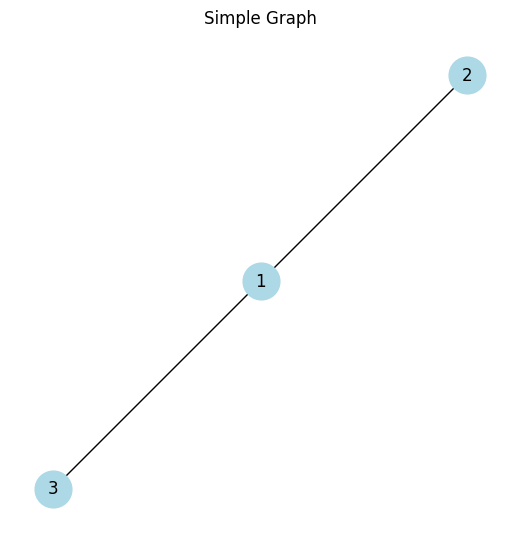

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)

# Add edges
G.add_edge(1, 2)
G.add_edge(1, 3)

# Draw the graph
plt.figure(figsize=(5,5))
nx.draw(G, with_labels=True, node_size=700, node_color="lightblue")
plt.title("Simple Graph")
plt.show()


### Types of Graphs

   **Directed Graph (Digraph):** Each edge has a direction, pointing from one node to another.
   
   ![Directed Graph](https://upload.wikimedia.org/wikipedia/commons/2/23/Directed_graph_no_background.svg)

   

   Here's how to create and visualize a directed graph:



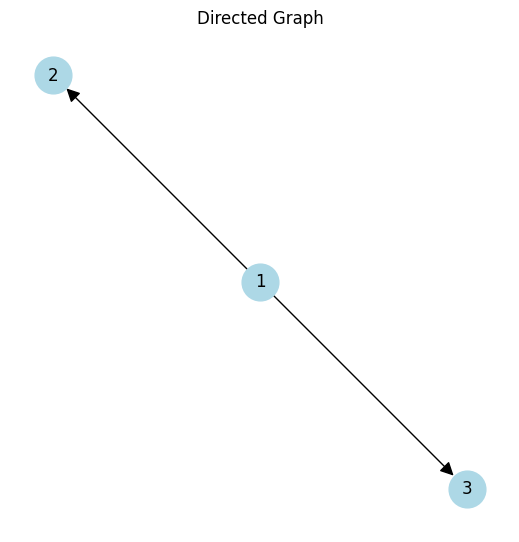

In [6]:
# Create a directed graph
D = nx.DiGraph()

# Add nodes and directed edges
D.add_edge(1, 2)
D.add_edge(1, 3)

# Draw the graph
plt.figure(figsize=(5,5))
nx.draw(D, with_labels=True, node_size=700, node_color="lightblue", arrowstyle="-|>", arrowsize=20)
plt.title("Directed Graph")
plt.show()


**Undirected Graph:** Edges do not have a direction; they simply connect two nodes.

   ![Undirected Graph](https://www.researchgate.net/profile/Stein-Malerud/publication/252675933/figure/fig1/AS:652972975476737@1532692297739/A-simple-undirected-graph-with-nodes-and-edges_W640.jpg)


   

**Weighted Graph:** Each edge has a numerical value(s) (weight(s)) associated with it, representing the strength or capacity of the connection.

   ![Weighted Graph](https://upload.wikimedia.org/wikipedia/commons/f/f0/Weighted_network.svg)


Here's how to create and visualize a weighted graph:

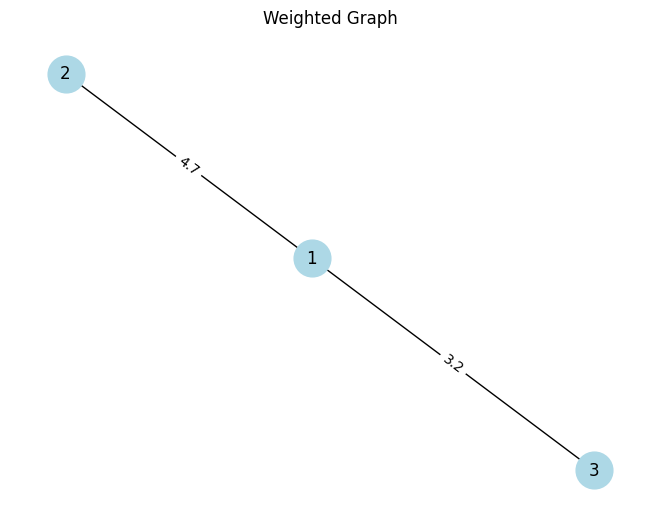

In [7]:
# Create a weighted graph
W = nx.Graph()

# Add weighted edges
W.add_edge(1, 2, weight=4.7)
W.add_edge(1, 3, weight=3.2)

# Draw the graph with edge labels
pos = nx.spring_layout(W)  # positions for all nodes
nx.draw(W, pos, with_labels=True, node_size=700, node_color="lightblue")
labels = nx.get_edge_attributes(W,'weight')
nx.draw_networkx_edge_labels(W, pos, edge_labels=labels)
plt.title("Weighted Graph")
plt.show()


### Adjacency Matrix Representation
Graphs can also be represented in matrix form using an adjacency matrix. The adjacency matrix of a graph is a square matrix where each element represents the presence (or absence) of an edge between two nodes.

Let's represent the graph we just visualized as an adjacency matrix.

In [8]:
import numpy as np

# Adjacency matrix representation of the graph
adj_matrix = np.array([
    [0, 1, 1, 0],  # Node 1 connections
    [1, 0, 1, 0],  # Node 2 connections
    [1, 1, 0, 1],  # Node 3 connections
    [0, 0, 1, 0]   # Node 4 connections
])

print("Adjacency Matrix:")
print(adj_matrix)

Adjacency Matrix:
[[0 1 1 0]
 [1 0 1 0]
 [1 1 0 1]
 [0 0 1 0]]


The output matrix corresponds to the graph we visualized, where `1` indicates the presence of an edge between nodes, and `0` indicates the absence of an edge.



## 2. Message Passing in GNNs

### 2.1 Basic Concept of Message Passing

In Graph Neural Networks (GNNs), **message passing** is a fundamental process where nodes in a graph communicate with their neighbors to update their own states or features. This process is applied iteratively, allowing nodes to aggregate information from their local neighborhood, which is crucial for tasks like node classification, graph classification, and link prediction.

#### Main assumptions:
- Node labels can be presented as a function of the node's input features and the input features of its neighbors.
- Contribution of each neighbor to the node's label can be summarized by a message function.
- The node's label can be updated by aggregating the messages from its neighbors. Since the order of neighbors is arbitrary, the aggregation function should be permutation-invariant.
- The node's label can be updated by combining the node's current label and the aggregated messages in an update function.

### 2.2 Message Function

The **message function** defines how information (messages) is transmitted from one node to another. The message function typically depends on the features of the source node and the edge connecting it to the target node.

#### Example:
For a node $v$, the message from its neighbor $u$ can be represented as:
$$ m_{uv} = f(x_u, e_{uv}) $$
where:
- $x_u$ is the feature of node $u$
- $e_{uv}$ is the feature of the edge connecting nodes $u$ and $v$
- $f$ is a learnable function or a predefined function, such as a linear transformation or a neural network.

### 2.3 Aggregation Function

The **aggregation function** is responsible for combining all the incoming messages from the neighbors of a node. Common aggregation methods include summation, mean, and max pooling.

#### Example:
The aggregated message at node $v$ can be computed as:
$$ a_v = \text{AGG}(\{m_{uv} : u \in \mathcal{N}(v)\}) $$
where:
- $\mathcal{N}(v)$ is the set of neighbors of node $v$
- $\text{AGG}$ is the aggregation function (e.g., sum, mean, max)

### 2.4 Update Function

The **update function** takes the aggregated messages and updates the state or features of the node. This step typically involves a learnable transformation, such as a neural network layer.

#### Example:
The updated state of node $v$ can be represented as:
$$ x'_v = \text{UPDATE}(x_v, a_v) $$
where:
- $x_v$ is the original feature of node $v$
- $a_v$ is the aggregated message
- $\text{UPDATE}$ is a learnable function (e.g., a neural network layer) that combines the original node features with the aggregated information from its neighbors.

### 2.5 Illustration of Message Passing

Below is an illustration of the message passing process in a GNN. Each node in the graph receives messages from its neighbors, aggregates these messages, and updates its state.

![Message Passing in GNN](https://ignnition.org/doc/_images/message_passing.png)

In this illustration, nodes pass messages to their neighbors, which are then aggregated and used to update the node's own state. This process is repeated over multiple iterations, allowing each node to gather information from progressively more distant neighbors.


### 2.6 Implementing Message Passing in Python
Let’s implement a simple message passing step using Python and the networkx library.

In [9]:
import networkx as nx
import numpy as np

# Create a graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4)])

# Initialize node features (for simplicity, we use integers)
node_features = {1: 1, 2: 2, 3: 3, 4: 4}

# Message function:
def message_function(u, v):
    ### Define message function here
    return 

# Aggregation function: sum of messages
def aggregation_function(neighbors):
    ### Define aggregation function here
    return

# Update function: 
def update_function(node, aggregated_message):
    ### Define update function here
    return


# Perform message passing for each node
new_node_features = {}
for node in G.nodes():
    # Get messages from neighbors
    messages = [message_function(neighbor, node) for neighbor in G.neighbors(node)]
    
    # Aggregate messages
    aggregated_message = aggregation_function(messages)
    
    # Update node feature (simple addition in this case)
    new_node_features[node] = update_function(node, aggregated_message)

print("Updated node features after message passing:")
print(new_node_features)


Updated node features after message passing:
{1: 6, 2: 6, 3: 10, 4: 7}


## 3. Graph Isomorphism and Weisfeiler-Lehman Test

### 3.1 Graph Isomorphism Problem

**Graph isomorphism** refers to the problem of determining whether two graphs are structurally identical. Two graphs are isomorphic if there exists a one-to-one correspondence between their nodes and edges such that adjacency is preserved.

#### Example:
- **Isomorphic Graphs:** Graphs with the same structure but potentially different node labels.
- **Non-Isomorphic Graphs:** Graphs with different structures.

### 3.2 Weisfeiler-Lehman Test

The **Weisfeiler-Lehman (WL) test** is a graph isomorphism test that iteratively refines node labels based on the labels of neighboring nodes. This process helps to distinguish non-isomorphic graphs by capturing the structure of the graph more effectively.

#### Algorithm:
1. **Initialization:** Assign a unique label to each node based on its degree (or another initial feature).
2. **Iteration:** At each step, update the label of each node based on the labels of its neighbors.
3. **Termination:** Repeat until labels stabilize or a predefined number of iterations is reached.

### 3.3 Illustration of Weisfeiler-Lehman Test

Here’s an illustration showing the process of the Weisfeiler-Lehman test on two example graphs.

![Weisfeiler-Lehman Test](https://miro.medium.com/v2/resize:fit:1400/0*SuYTb17bUhKzH-Ti)

In this illustration, the WL test refines the node labels in each iteration, allowing the algorithm to distinguish between graphs with different structures.

### 3.4 Implementing Weisfeiler-Lehman Test in Python

Let’s implement a basic version of the Weisfeiler-Lehman test using Python. We’ll use the `networkx` library for graph manipulation.



#### Creating Graphs for Testing

In [33]:
# Create two example graphs
G1 = nx.Graph([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1), (3, 6)])
G2 = nx.Graph([(1, 2), (2, 3), (3, 1), (4, 5), (5, 6), (6, 4), (3, 6)]) 

#### Visualization of the Graphs

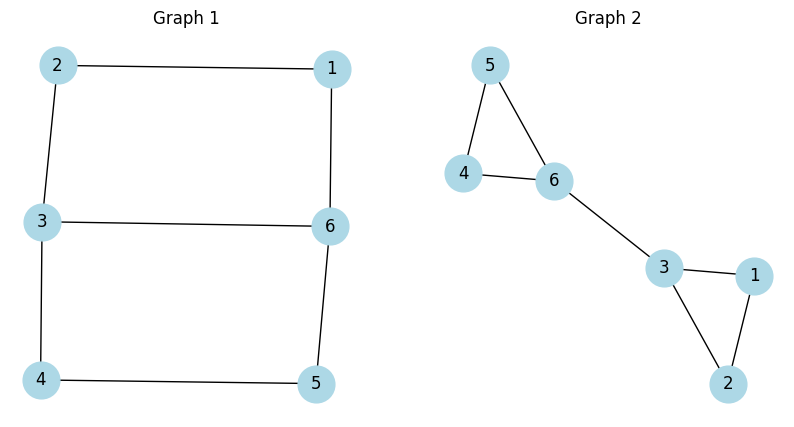

In [34]:
# Visualize the graphs
plt.figure(figsize=(10, 5))
plt.subplot(121)
nx.draw(G1, with_labels=True, node_size=700, node_color="lightblue")
plt.title("Graph 1")
plt.subplot(122)
nx.draw(G2, with_labels=True, node_size=700, node_color="lightblue")
plt.title("Graph 2")
plt.show()

#### Weisfeiler-Lehman Test Implementation

In [35]:
# import networkx as nx
from collections import defaultdict

def weisfeiler_lehman(graph, iterations=2):
    # Initialize node labels with their degrees
    node_labels = {node: str(degree) for node, degree in graph.degree()}
    
    for _ in range(iterations):
        new_labels = {}
        # Create a mapping from node label and its neighbors' labels to a new label
        label_map = defaultdict(lambda: defaultdict(int))
        for node in graph.nodes():
            neighbors_labels = [node_labels[neighbor] for neighbor in graph.neighbors(node)]
            combined_label = (node_labels[node], tuple(sorted(neighbors_labels)))
            new_label = hash(combined_label)  # Using hash as a simple unique new label
            new_labels[node] = new_label
        node_labels = new_labels
    
    return node_labels



# Apply Weisfeiler-Lehman test
labels_G1 = weisfeiler_lehman(G1)
labels_G2 = weisfeiler_lehman(G2)

print("Node labels for Graph G1:")
print(labels_G1)

print("Node labels for Graph G2:")
print(labels_G2)


Node labels for Graph G1:
{1: 8431530891565846185, 2: 8431530891565846185, 3: -1052763993619436327, 4: 8431530891565846185, 5: 8431530891565846185, 6: -1052763993619436327}
Node labels for Graph G2:
{1: 8431530891565846185, 2: 8431530891565846185, 3: -1052763993619436327, 4: 8431530891565846185, 5: 8431530891565846185, 6: -1052763993619436327}


#### Visualization of the Node Labels

Text(0.5, 1.0, 'Graph 2')

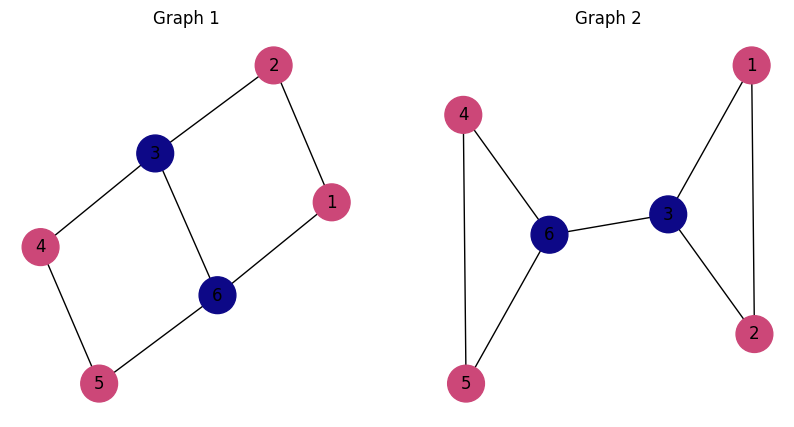

In [36]:
# all the nodes in the graphs
nodes_labels = set(labels_G1.values()) | set(labels_G2.values())

# create a mapping from node labels to colors
label_to_color = {label: idx/len(nodes_labels) for idx, label in enumerate(nodes_labels)}

# create a list of colors for each node in the graph
node_colors_G1 = [label_to_color[label] for label in labels_G1.values()]
node_colors_G2 = [label_to_color[label] for label in labels_G2.values()]

# Visualize the graphs with node colors
plt.figure(figsize=(10, 5))
plt.subplot(121)
nx.draw(G1, with_labels=True, node_size=700, node_color=node_colors_G1, cmap=plt.cm.plasma, vmin=0, vmax=1)
plt.title("Graph 1")
plt.subplot(122)
nx.draw(G2, with_labels=True, node_size=700, node_color=node_colors_G2, cmap=plt.cm.plasma, vmin=0, vmax=1)
plt.title("Graph 2")

### 3.5 Limitations and Extensions
The basic Weisfeiler-Lehman test has limitations, such as:
  * **Limited Expressiveness:** The test may fail to distinguish some non-isomorphic graphs, particularly those with complex or symmetric structures.
  
  * **Extensions:** To address these limitations, higher-order Weisfeiler-Lehman tests and other advanced techniques can be used to increase the discriminative power of the test.
  
**Higher-Order WL Test:**

An extension that refines the labels using higher-order neighborhoods, providing more discriminative power.

## 4. Message-Passing Neural Networks (MPNN)

### 4.1 Architecture Overview

**Message-Passing Neural Networks (MPNNs)** are a class of Graph Neural Networks (GNNs) that operate by iteratively exchanging information (messages) between nodes in a graph. The core idea is that each node updates its feature vector by aggregating messages from its neighbors, allowing the network to capture complex dependencies and patterns in the graph structure.

#### Key Components of MPNNs:

1. **Message Function:** Determines how information is passed from one node to another.
2. **Aggregation Function:** Combines incoming messages from neighboring nodes.
3. **Update Function:** Updates the node's state or feature based on the aggregated messages.







### Using `MessagePassing` in PyTorch Geometric

`MessagePassing` is a base class provided by PyTorch Geometric for implementing message-passing neural networks. It abstracts the process of message passing, aggregation, and updating. Let’s understand how to use it:

#### Key Methods in `MessagePassing`:

1. **`forward()`**: Defines the forward pass of the layer. It usually takes `x` (node features) and `edge_index` (tensor containing the indices of source and target nodes for each edge).
   
2. **`message()`**: Computes messages to be sent along the edges. This method is called for each edge during the message-passing phase.

3. **`aggregate()`**: Aggregates messages from neighboring nodes. Common aggregation methods are sum, mean, and max.

4. **`update()`**: Updates the node embeddings after the aggregation of messages.

5. **`propagate()`**: A helper function that combines `message()`, `aggregate()`, and `update()` functions. It is the main method called during the forward pass to execute the message-passing step.

### Data Structures for Inputs

- **`x` (Node Features)**: A tensor of shape `(num_nodes, num_features)` representing the features for each node.
- **`edge_index`**: A tensor of shape `(2, num_edges)` where each column represents a directed edge from source to target.
- **`edge_attr` (optional)**: A tensor of shape `(num_edges, num_edge_features)` representing the features for each edge.

### Implementing an MPNN using `MessagePassing`

Below is a detailed example of how to implement an MPNN layer using the `MessagePassing` class in PyTorch Geometric:


In [ ]:
import torch
import torch_geometric.nn as pyg_nn
from torch_geometric.utils import add_self_loops, degree



# Define an MPNN model in PyTorch Geometric
class Custom_MPNN(pyg_nn.MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(Custom_MPNN, self).__init__()
        self.lin = torch.nn.Linear(in_channels, out_channels)
    
    def forward(self, x, edge_index):
        # Add self-loops to the adjacency matrix to consider self-connections
        edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))

        
        # Perform message passing
        return self.propagate(edge_index, x=x)
    
    def message(self, x_j):
        # x_j: Input node features

        # Perform linear transformation on node features
        return 
    

    def aggregate(self, inputs, index):
        # Aggregates messages for each node 

        # Perform sum aggregation
        return

    def update(self, aggr_out, x):
        # aggr_out: Aggregated messages
        # x: Original node features

        # Perform update operation on node features: simple addition
        return 
    



### 4.2 Variants of MPNNs

Several variants of MPNNs have been developed, each with unique characteristics and applications. Here are some of the most popular ones:

#### 4.2.1 Graph Convolutional Networks (GCNs)

**Graph Convolutional Networks (GCNs)** apply convolutional operations to graphs, allowing nodes to aggregate information from their neighbors based on the graph structure.

- **GCN Formula:**
  $$ H^{(l+1)} = \text{ReLU} \left( \hat{A} H^{(l)} W^{(l)} \right) $$
  where:
  - $\hat{A}$ is the normalized adjacency matrix.
  - $H^{(l)}$ is the node feature matrix at layer $l$.
  - $W^{(l)}$ is the weight matrix at layer $l$.


In terms of message, aggregation, and update functions, GCN can be described as follows:
- **Message Function:** Linear transformation of node features:
  $$ m^{(l+1)}_{uv} = \frac{1}{\sqrt{ N_u N_v}}W h^{(l)}_u $$
   where $ N_u $ and $ N_v $ are the numbers of neighbors of nodes $u$ and $v$, respectively.
  
- **Aggregation Function:** Summing the messages from neighbors:
  $$ a^{(l+1)}_v = \sum_{u \in \mathcal{N}(v)} m^{(l+1)}_{uv} $$

- **Update Function:** Applying a neural network layer (e.g., ReLU activation):
  $$ h^{(l+1)}_v = \text{ReLU}(a^{(l+1)}_v) $$

#### Exercise: GCN Layer in pytorch geometric

In [11]:
import torch
import torch.nn as nn
import torch_geometric.nn as pyg_nn
from torch_geometric.utils import add_self_loops, degree
from torch.nn.functional import relu


class GCNLayer(nn.MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(GCNLayer, self).__init__(aggr='add')

    # Implement the GCN layer 

# Example usage
gcn_layer = GCNLayer(in_channels=3, out_channels=2)
print(gcn_layer)


/usr/local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


GCNLayer(
  (gcn_conv): GCNConv(3, 2)
)


### 4.2.2 Graph Attention Networks (GAT)

**Graph Attention Networks (GAT)** incorporate an attention mechanism that allows the model to weigh the importance of different neighbors differently. This helps the network focus on more relevant parts of the graph.

#### Key Features of GAT:
- **Attention Mechanism:** Assigns different weights to different neighbors based on their relevance.
- **Self-Attention:** Allows each node to attend to its neighbors with varying levels of importance.
- **Scalability:** Handles graphs of varying sizes and densities efficiently.
 
 * **GAT Formula:** The core operation in GAT involves calculating attention coefficients and aggregating information from neighbors. The formula for updating a node's representation in GAT can be expressed as:
 
$ H_i' = \text{LeakyReLU} \left( \sum_{j \in \mathcal{N}(i)} \alpha_{ij} W_v h_j \right) $ where:
* $H_i'$ is the updated feature vector for node $i$.
* $\alpha_{ij}$ is the attention coefficient between nodes $i$ and $j$.
* $W$ is the weight matrix.
* $\mathcal{N}(i)$ denotes the set of neighbors of node $i$.


- **Message Function:**  
  In GAT, the message function computes the attention coefficient $\alpha_{ij}$ for each pair of neighboring nodes $(i, j)$. This coefficient determines how much importance node $i$ should give to node $j$'s features. The message is then a combination of the attention coefficient and the transformed node features:

  $$
  m_{ij} = \alpha_{ij} W_v h_j
  $$

  Here, $W_v$ is a learnable weight matrix that linearly transforms the feature vector $h_j$ of the neighbor node $j$. The attention coefficient $\alpha_{ij}$ is computed using a self-attention mechanism:

  $$
  \alpha_{ij} = \frac{\exp(\text{LeakyReLU}( [W_q h_i || W_k h_j]))}{\sum_{k \in \mathcal{N}(i)} \exp(\text{LeakyReLU}( [W_q h_i || W_k h_k]))}
  $$

  where $W_k$ and $W_q$ are  learnable matrices that help compute the importance of edge $(i, j)$.

- **Aggregation Function:**  
  The aggregation function sums up all the weighted messages from the neighbors of node $i$:

  $$
  a_i = \sum_{j \in \mathcal{N}(i)} m_{ij} = \sum_{j \in \mathcal{N}(i)} \alpha_{ij} W_v h_j
  $$

  This sum aggregates the messages (transformed features) from the neighbors of node $i$, weighted by the attention coefficients $\alpha_{ij}$.

- **Update Function:**  
  The update function applies a non-linear transformation (e.g., LeakyReLU) to the aggregated messages to compute the updated node feature:

  $$
  h_i' = \text{LeakyReLU}(a_i) 
  $$

  This non-linearity allows the model to learn more complex patterns in the graph.




#### Exercise: GAT Layer in pytorch-geometric





In [12]:
class GATLayer(pyg_nn.MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(GATLayer, self).__init__(aggr='add')

    # Implement the GAT layer



GATLayer(
  (gat_conv): GATConv(3, 2, heads=1)
)


#### 4.2.3 **GraphSAGE**

**GraphSAGE** (Sample and Aggregation) is a variant of GNNs that scales well to large graphs by sampling a fixed-size neighborhood and aggregating information from these sampled neighbors. Unlike traditional GNNs that operate in a transductive setting (where all nodes are seen during training), GraphSAGE is designed to work in an inductive setting, meaning it can generalize to unseen nodes and graphs.

#### Key Features of GraphSAGE:
- **Inductive Learning:** Learns functions that can be applied to new nodes or graphs not seen during training.
- **Sampling:** Samples a fixed-size neighborhood for each node, making it computationally efficient and scalable.
- **Flexible Aggregation:** Supports different aggregation functions (mean, LSTM, pooling).

#### GraphSAGE Formula:
The formula for updating a node's representation in GraphSAGE can be expressed as:

$$ H'_i = \text{MLP} \left( \text{AGG} \left( \{H_j : j \in \mathcal{N}(i)\} \right) \right) $$

where:
- $\text{AGG}$ can be mean, LSTM, or pooling aggregation functions.
- $\text{MLP}$ is a multi-layer perceptron that combines the aggregated information.

### GraphSAGE in Terms of Message, Aggregation, and Update Functions:

- **Message Function:**  
  In GraphSAGE, the message function computes messages from sampled neighboring nodes. Unlike other GNNs, GraphSAGE samples a fixed number of neighbors instead of using all neighbors, which helps in reducing computation for large graphs. The message is defined as the transformation of the neighbor's feature vectors:

  $$
  m_{ij} = h_j
  $$

  Here, $h_j$ represents the feature vector of the neighbor node $j$. The feature vectors are aggregated directly without additional transformations, as the transformation is applied after aggregation in GraphSAGE.

- **Aggregation Function:**  
  The aggregation function in GraphSAGE is flexible and can be one of several types, such as mean, LSTM, or pooling. The aggregation function computes the aggregated feature vector for node $i$ by combining the features of its sampled neighbors:

  1. **Mean Aggregator:**
     $$
     a_i = \frac{1}{|\mathcal{N}(i)|} \sum_{j \in \mathcal{N}(i)} h_j
     $$

     Here, the mean of the neighbors' features is taken.

  2. **LSTM Aggregator:**
     $$
     a_i = \text{LSTM}( \{ h_j : j \in \mathcal{N}(i) \} )
     $$

     In this case, the neighbors' features are passed through an LSTM to capture order-dependent information.

  3. **Pooling Aggregator:**
     $$
     a_i = \text{max}(\{ \text{ReLU}(W h_j + b) : j \in \mathcal{N}(i) \})
     $$

     Here, each neighbor's features are passed through a fully connected layer with ReLU activation, followed by a max-pooling operation.

- **Update Function:**  
  The update function applies a Multi-Layer Perceptron (MLP) to the concatenation of the node's own features and the aggregated features. This allows the node to incorporate both its own information and the information from its neighbors:

  $$
  h_i' = \text{MLP} \left( \text{concat}(h_i, a_i) \right)
  $$

  Here, the MLP consists of fully connected layers, and $\text{concat}(h_i, a_i)$ denotes the concatenation of the node's current feature vector $h_i$ with the aggregated neighbor features $a_i$. This enables the model to learn more complex combinations of features.


**Example: GraphSAGE Layer in Python**

In [13]:
class GraphSAGELayer(pyg_nn.MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(GraphSAGELayer, self).__init__(aggr='add')

    # Implement the GraphSAGE layer

# Example usage
sage_layer = GraphSAGELayer(in_channels=3, out_channels=2)
print(sage_layer)


GraphSAGELayer(
  (sage_conv): SAGEConv(3, 2, aggr=mean)
)


### 4.3 Training and Optimization

In this exercise, you will learn how to train Graph Neural Networks (GNNs) using PyTorch Geometric on a standard graph dataset. The goal is to load a dataset, split it into training and test sets, choose one of the graph architectures (GCN, GAT, GraphSAGE), define a network, and train it to make predictions on the graph data.

### Task:

1. **Choose a Dataset**: We will use the **Cora** dataset, which is a common benchmark for GNNs. It is a citation network where nodes represent documents, and edges represent citations between them.

2. **Split the Data**: Split the dataset into training, validation, and test sets.

3. **Choose a Graph Architecture**: Choose one of the predefined architectures (e.g., GCN, GAT, GraphSAGE).

4. **Define the Network**: Initialize the network with the chosen architecture.

5. **Train the Network**: Train the network on the training set and evaluate its performance on the test set.

### 4.3.1 Code Drafts

Below are the draft cells to guide you through each step:

#### Step 1: Load the Dataset

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

# Load the Cora dataset
dataset = Planetoid(root='data/Cora', name='Cora', transform=NormalizeFeatures())
data = dataset[0]  # Cora dataset has only one graph

print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Number of features: {data.num_node_features}')
print(f'Number of classes: {dataset.num_classes}')

#### Step 2: Split the Data
PyTorch Geometric automatically handles data splits for Planetoid datasets (Cora, Citeseer, Pubmed). The dataset has built-in masks for training, validation, and test sets:

In [ ]:
# Training, validation, and test masks
train_mask = data.train_mask
val_mask = data.val_mask
test_mask = data.test_mask

print(f'Number of training nodes: {train_mask.sum().item()}')
print(f'Number of validation nodes: {val_mask.sum().item()}')
print(f'Number of test nodes: {test_mask.sum().item()}')


#### Step 3: Choose a Graph Architecture
Choose one of the graph architectures (e.g., GCN, GAT, GraphSAGE) that you have defined above. For this example, we can use Graph Convolutional Networks (GCN). You can use any other architecture and number of layers as needed.

In [ ]:
class GCNNet(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCNNet, self).__init__()
        self.conv1 = GCNLayer(in_channels, hidden_channels)
        self.conv2 = GCNLayer(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        # First GCN layer + ReLU activation
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        # Second GCN layer + LogSoftmax activation for multi-class classification
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)
        
# Initialize the GCN model
model = GCNNet(in_channels=dataset.num_node_features, hidden_channels=16, out_channels=dataset.num_classes)
print(model)

#### Step 4: Train the Network
Define the training function and train the network using the training data:

In [ ]:
# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()

def train():
    model.train()
    optimizer.zero_grad()  # Clear gradients
    out = model(data.x, data.edge_index)  # Forward pass
    loss = criterion(out[train_mask], data.y[train_mask])  # Compute the loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update model parameters
    return loss.item()

# Store the training loss values
loss_values = []

# Training loop
for epoch in range(200):
    loss = train()
    loss_values.append(loss)
    if epoch % 10 == 0:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

#### Step 5: Evaluate the Network
Evaluate the trained model on the test set:

In [ ]:
def test():
    model.eval()
    out = model(data.x, data.edge_index)  # Forward pass
    pred = out.argmax(dim=1)  # Use the class with the highest probability
    correct = (pred[test_mask] == data.y[test_mask]).sum()  # Check how many predictions match the true labels
    acc = int(correct) / int(test_mask.sum())  # Calculate accuracy
    return acc

test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')


#### Step 6: Plot the Learning Curve
To visualize the learning process, plot the training loss over epochs:

In [ ]:
import matplotlib.pyplot as plt

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_values) + 1), loss_values, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()


## 5. Approaches to the Isomorphism Problem in GNNs

### 5.1 Expressive Power of GNNs

The **expressive power** of Graph Neural Networks (GNNs) refers to their ability to distinguish between different graph structures. While GNNs have shown great promise in learning from graph-structured data, they have inherent limitations when it comes to distinguishing non-isomorphic graphs—graphs that have the same structure but are labeled differently.

#### Key Points:
- **Graph Isomorphism:** Two graphs are isomorphic if there exists a one-to-one correspondence between their nodes and edges such that adjacency is preserved.
- **Expressive Limitations of GNNs:** Standard GNNs, such as those based on message passing, may fail to distinguish between certain non-isomorphic graphs. This limitation arises because the node embeddings may converge to similar representations, even if the underlying graph structures are different.

#### Example:
Consider two non-isomorphic graphs that have the same node degree distribution. A simple GNN might produce identical node embeddings for both graphs, failing to recognize that they are actually different.

### 5.2 Advanced Techniques to Address Graph Isomorphism

To overcome the limitations of standard GNNs in distinguishing non-isomorphic graphs, several advanced techniques and specialized architectures have been developed. These techniques enhance the expressive power of GNNs and provide better solutions to the graph isomorphism problem.

#### 5.2.1 Graph Isomorphism Network (GIN)

**Graph Isomorphism Network (GIN)** is a type of GNN designed to have a stronger expressive power, making it as powerful as the Weisfeiler-Lehman (WL) test in distinguishing non-isomorphic graphs.

- **Key Idea:** GIN uses an aggregation function that mimics the WL test, allowing it to distinguish graphs that other GNNs might not.
- **Architecture:** GINs typically use a sum aggregation function combined with a multi-layer perceptron (MLP) for node updates, which enhances their ability to capture graph structure.

#### GIN Formula:
$$ h_v^{(l+1)} = \text{MLP}^{(l)} \left( \left(1 + \epsilon^{(l)} \right) \cdot h_v^{(l)} + \sum_{u \in \mathcal{N}(v)} h_u^{(l)} \right) $$
where:
- $h_v^{(l)}$ is the feature of node $v$ at layer $l$.
- $\epsilon^{(l)}$ is a learnable parameter.
- $\text{MLP}^{(l)}$ is a multi-layer perceptron.


#### Example: GIN Layer in Python

In [15]:
import torch
import torch.nn as nn
import torch_geometric.nn as pyg_nn

class GINLayer(pyg_nn.MessagePassing):
    def __init__(self, in_channels, out_channels, eps=0.0):
        super(GINLayer, self).__init__()
        # Implement GIN layer

# Example usage
gin_layer = GINLayer(in_channels=3, out_channels=2)
print(gin_layer)

GINLayer(
  (mlp): Sequential(
    (0): Linear(in_features=3, out_features=2, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2, out_features=2, bias=True)
  )
)


#### 5.2.2 Cell-Weisfeiler-Lehman Networks (CW Networks)

**Cell-Weisfeiler-Lehman Networks (CW Networks)** are an extension of the Weisfeiler-Lehman (WL) test designed to operate on cell complexes rather than just graphs. This version simplifies the implementation by focusing on nodes (0-cells) and edges (1-cells) only.


#### Illustration:
![The CWL colouring procedure for the yellow edge of the cell complex.](https://d3i71xaburhd42.cloudfront.net/093bd7a7dd31a8eb4da371d012da5fd272bb96ca/4-Figure4-1.png)

##### Key Concepts:
- **Cell Complexes:** These are higher-dimensional generalizations of graphs. While graphs consist of nodes (0-cells) and edges (1-cells), cell complexes can include higher-dimensional cells like faces (2-cells) and volumes (3-cells).
- **Message Passing on Cells:** In CW Networks, message passing extends to higher-dimensional cells, allowing the network to aggregate information from more complex structures.


##### Simplified CW Layer Implementation

Below is a simplified implementation of a CW Network that focuses on nodes and edges:




In [47]:
import torch
from torch_geometric.nn import MessagePassing
import torch.nn.functional as F
from torch_geometric.utils import scatter
from torch.nn.parameter import Parameter
from torch.nn.functional import relu

class SimplifiedCWLayer(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(SimplifiedCWLayer, self).__init__(aggr='add')  # Define aggregation method
        self.in_channels = in_channels
        self.out_channels = out_channels  
        self.W_node_to_edge = Parameter(torch.randn(in_channels, out_channels))
        self.W_edge_to_node = Parameter(torch.randn(in_channels, out_channels))
        self.W_node_to_neigh = Parameter(torch.randn(in_channels, out_channels))
        self.W_node_to_itself = Parameter(torch.randn(in_channels, out_channels))
        self.W_edge_to_itself = Parameter(torch.randn(in_channels, out_channels))

    def forward(self, x, edge_index, edge_attr):
        # x: Node features
        # edge_index: Edge indices
        # edge_attr: Edge features

        edge_message = # Implement edge message computation
        edge_aggr = # Implement edge aggregation
        edge_update = # Implement edge update
        node_update = self.propagate(edge_index, x=x, edge_attr=edge_attr)
        return node_update, edge_update
    
    def message(self, x_j, edge_attr):
        # x_j: Input node features
        # edge_attr: Input edge features

        node_message = # Implement node component computation
        node_message += # Implement edge component computation



        return node_message
    
    def update(self, aggr_out, x):
        # aggr_out: Aggregated messages
        # x: Original node features

        output = # Implement update function
        return output
    
    

# Example usage
x = torch.randn(3, 3)  # 3 nodes, 3 features per node
edge_index = torch.tensor([[0, 1], [1, 2]], dtype=torch.long).t().contiguous()  # Edges in COO format
edge_attr = torch.randn(2, 3)  # 2 edges, 3 features per edge

cw_layer = SimplifiedCWLayer(in_channels=3, out_channels=2)
x, edge_attr = cw_layer(x, edge_index, edge_attr)

print("Updated Node Features:", x)
print("Updated Edge Features:", edge_attr)


Updated Node Features: tensor([[0.4898, 0.0000],
        [2.7686, 2.7970],
        [0.0000, 0.0000]], grad_fn=<ReluBackward0>)
Updated Edge Features: tensor([[2.2116, 0.0000],
        [0.0000, 0.0000]], grad_fn=<ReluBackward0>)


#### Explanation of the Code:

* **Node and Edge Features:** The code focuses on nodes and edges.

* **Message Passing:** The SimplifiedCWLayer class uses message, update, and aggregate functions to update node and edge features.

* **PyTorch Geometric Integration:** Utilizes `MessagePassing` for streamlined GNN operations.

#### Exercise: Training and Evaluating a GNN
In this final exercise, you will:

1. **Select a Graph Dataset:** Choose a dataset from `PyTorch Geometric`, such as `Cora`, `Citeseer`, or `Pubmed`.
2. **Choose a GNN Layer:** Select one of the layers implemented above, either `GINLayer` or `SimplifiedCWLayer`.
3. **Build a Network:** Create a GNN using the selected layer.
4. **Train the Network:** Train the network on the training dataset, plot the training loss curve, and evaluate its performance on the test dataset.


#### Code Draft:

In [ ]:
import torch
from torch_geometric.datasets import Planetoid
from torch_geometric.loader import DataLoader
import torch.nn.functional as F

# Step 1: Load Dataset
dataset = Planetoid(root='/tmp/Cora', name='Cora')

# Step 2: Define Network
class GNNModel(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GNNModel, self).__init__()
        self.conv1 = SimplifiedCWLayer(in_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x, _ = self.conv1(x, edge_index, data.edge_attr)
        return F.log_softmax(x, dim=1)

# Step 3: Initialize Model
model = GNNModel(in_channels=dataset.num_node_features, out_channels=dataset.num_classes)

# Step 4: Training Loop
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
train_losses = []

for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    out = model(dataset[0])
    loss = F.nll_loss(out[dataset[0].train_mask], dataset[0].y[dataset[0].train_mask])
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

# Step 5: Plot Training Curve
import matplotlib.pyplot as plt

plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

# Step 6: Evaluate Model
model.eval()
_, pred = model(dataset[0]).max(dim=1)
correct = (pred[dataset[0].test_mask] == dataset[0].y[dataset[0].test_mask]).sum()
acc = int(correct) / int(dataset[0].test_mask.sum())
print(f'Test Accuracy: {acc:.4f}')


#### Tasks:
1. **Experiment with Different Architectures:** Use either `GINLayer` or `SimplifiedCWLayer`.
2. **Modify Hyperparameters:** Change learning rates, epochs, and architectures.
3. **Analyze Results:** Observe and discuss the model's performance.

## Conclusion

In this tutorial, we covered the foundational concepts of Graph Neural Networks (GNNs), delving into graph theory, message passing, and advanced techniques for addressing the graph isomorphism problem. We explored different types of GNN architectures, such as Graph Convolutional Networks (GCNs), Graph Attention Networks (GATs), GraphSAGE, and more advanced methods like Graph Isomorphism Networks (GIN) and Cell-Weisfeiler-Lehman Networks (CW Networks). Each architecture enhances the expressive power of GNNs in different ways, making them more robust for various graph-based tasks.

Understanding these foundational concepts is crucial for leveraging GNNs in real-world applications such as social network analysis, molecular graph generation, knowledge graph completion, and many more. As we have seen, the choice of architecture and technique depends on the nature of the problem and the underlying assumptions about the graph data. The advanced techniques and architectures introduced here provide a solid foundation for tackling complex graph learning problems.
